In [0]:
from google.colab import drive
drive.mount('/content/drive')

* 마운트 결과 확인

In [0]:
!ls /content/drive/My\ Drive/Colab\ Notebooks/datasets

test  train  validation


## Image_File Directory Setting

In [0]:
import os

base_dir = '/content/drive/My Drive/Colab Notebooks/datasets'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# test_dir = os.path.join(base_dir, 'test')

## ImageDataGenerator( )

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 이미지 1/255 스케일 조정
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=20,
        class_mode='binary')

Found 3252 images belonging to 2 classes.
Found 162 images belonging to 2 classes.


* ImageDataGenerator( ) Test
> train_generator

In [0]:
for data_batch, labels_batch in train_generator:
    print('배치 데이터 크기:', data_batch.shape)
    print('배치 레이블 크기:', labels_batch.shape)
    break

배치 데이터 크기: (20, 100, 100, 3)
배치 레이블 크기: (20,)


## Keras CNN Modeling

In [0]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


* Model Summary

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         1

## Model Compile

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Model Fit

In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
 99/100 [============================>.] - ETA: 6s - loss: 0.1891 - acc: 0.9635 Epoch 1/30
Epoch 1/30
100/100 [==============================] - 740s 7s/step - loss: 0.1888 - acc: 0.9634 - val_loss: 1.5483 - val_acc: 0.5286
Epoch 2/30
 99/100 [============================>.] - ETA: 3s - loss: 0.1375 - acc: 0.9586Epoch 1/30
Epoch 1/30
100/100 [==============================] - 366s 4s/step - loss: 0.1362 - acc: 0.9590 - val_loss: 2.6278 - val_acc: 0.5286
Epoch 3/30
 99/100 [============================>.] - ETA: 0s - loss: 0.1149 - acc: 0.9610Epoch 1/30
Epoch 1/30
100/100 [==============================] - 11s 107ms/step - loss: 0.1139 - acc: 0.9613 - val_loss: 2.1435 - val_acc: 0.5187
Epoch 4/30
 99/100 [============================>.] - ETA: 0s - loss: 0.0748 - acc: 0.9707Epoch 1/30
Epoch 1/30
100/100 [==============================] - 11s 107ms/step - loss: 0.0762 - acc: 0.9700 - val_loss: 0.8427 - val_acc: 0.5132
Epoch 5/30
Epoch 5/30
 99/100 [============================

## Accuracy & Loss Data

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

## Visualization
* Accuracy

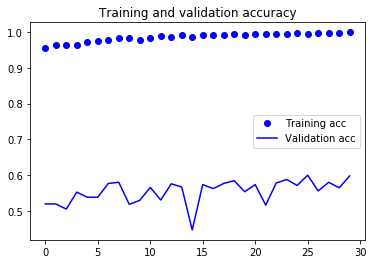

In [0]:
epochs = range(len(acc))

import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

* Loss

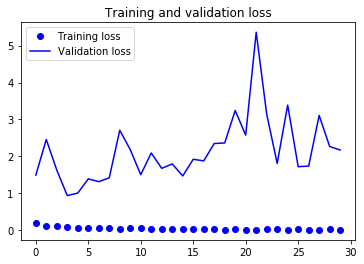

In [0]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Model save

In [0]:
model.save('/content/drive/My Drive/Colab Notebooks/classification.hdf5')

!ls /content/drive/My\ Drive/Colab\ Notebooks

classification.hdf5   datasets	      Mounting.ipynb
Classification.ipynb  Labeling.ipynb
